In [1]:
import pandas as pd

f=pd.read_csv("https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv")
f.info()

nc=f.columns[f.isna().any()]
print("\n The Featured names where null value exists are:\n", nc.tolist())

f["Age"]=f["Age"].fillna(f["Age"].mean())
#f.info()
f["Cabin"]=f["Cabin"].fillna("Unknown")
f.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 The Featured names where null value exists are:
 ['Age', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------      

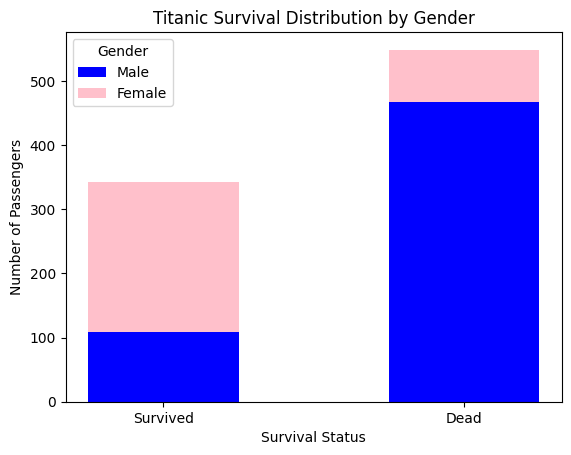

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


male_survived = f[(f["Survived"] == 1) & (f["Sex"] == "male")].shape[0]
female_survived = f[(f["Survived"] == 1) & (f["Sex"] == "female")].shape[0]

male_dead = f[(f["Survived"] == 0) & (f["Sex"] == "male")].shape[0]
female_dead = f[(f["Survived"] == 0) & (f["Sex"] == "female")].shape[0]

# Create bar data
dead_counts = [male_dead, female_dead]      
survived_counts = [male_survived, female_survived] 

labels = ["Survived", "Dead"]
bar_width = 0.5  


plt.bar(labels, [male_survived, male_dead], width=bar_width, label="Male", color="blue")
plt.bar(labels, [female_survived, female_dead], width=bar_width, bottom=[male_survived, male_dead], label="Female", color="pink")


plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival Distribution by Gender")
plt.legend(title="Gender")


plt.show()


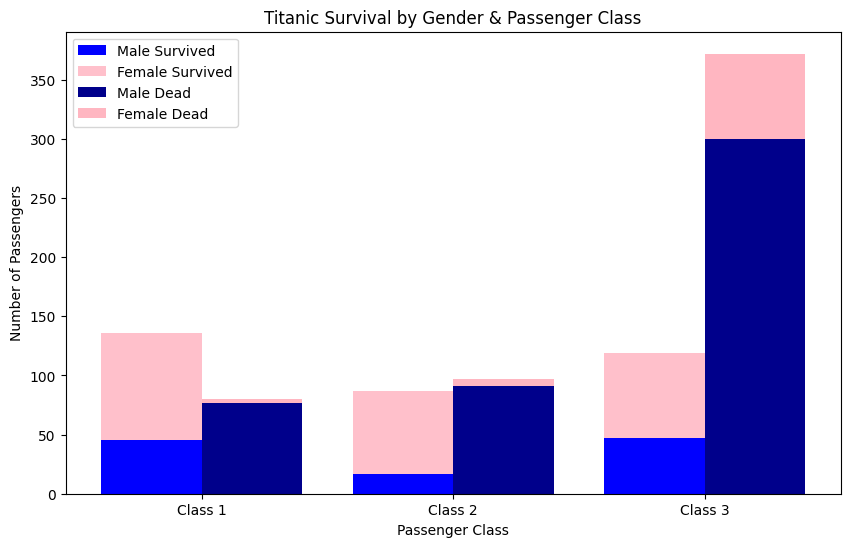

In [5]:
import numpy as np
pclasses = sorted(f["Pclass"].unique())


male_survived = [f[(f["Survived"] == 1) & (f["Sex"] == "male") & (f["Pclass"] == p)].shape[0] for p in pclasses]
female_survived = [f[(f["Survived"] == 1) & (f["Sex"] == "female") & (f["Pclass"] == p)].shape[0] for p in pclasses]

male_dead = [f[(f["Survived"] == 0) & (f["Sex"] == "male") & (f["Pclass"] == p)].shape[0] for p in pclasses]
female_dead = [f[(f["Survived"] == 0) & (f["Sex"] == "female") & (f["Pclass"] == p)].shape[0] for p in pclasses]


x = np.arange(len(pclasses))  
bar_width = 0.4  


plt.figure(figsize=(10, 6))

plt.bar(x - bar_width / 2, male_survived, width=bar_width, color="blue", label="Male Survived")
plt.bar(x - bar_width / 2, female_survived, width=bar_width, bottom=male_survived, color="pink", label="Female Survived")

plt.bar(x + bar_width / 2, male_dead, width=bar_width, color="darkblue", label="Male Dead")
plt.bar(x + bar_width / 2, female_dead, width=bar_width, bottom=male_dead, color="lightpink", label="Female Dead")


plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival by Gender & Passenger Class")
plt.xticks(x, labels=[f"Class {p}" for p in pclasses])
plt.legend()


plt.show()

In [6]:

conditions = [
    (f["Age"] <= 16),
    (f["Age"] <= 26),
    (f["Age"] <= 36),
    (f["Age"] <= 62),
    (f["Age"] > 62)
]

choices = [0, 1, 2, 3, 4]


f["AgeClass"] = np.select(conditions, choices)


print(f[["Age", "AgeClass"]].head(10))  # Check first 10 rows

         Age  AgeClass
0  22.000000         1
1  38.000000         3
2  26.000000         1
3  35.000000         2
4  35.000000         2
5  29.699118         2
6  54.000000         3
7   2.000000         0
8  27.000000         2
9  14.000000         0


In [7]:

f.drop(columns=["Age"], inplace=True)

print(f.head()) 


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket     Fare    Cabin Embarked  AgeClass  
0         A/5 21171   7.2500  Unknown        S         1  
1          PC 17599  71.2833      C85        C         3  
2  STON/O2. 3101282   7.9250  Unknown        S         1  
3            113803  53.1000     C123        S         2  
4            373450

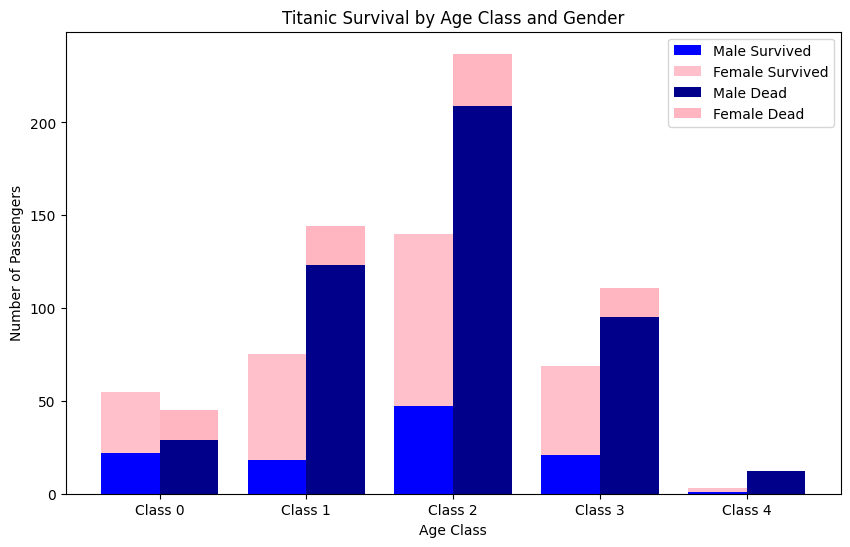

In [8]:
import matplotlib.pyplot as plt
import numpy as np


male_survived = f[(f["Survived"] == 1) & (f["Sex"] == "male")]["AgeClass"].value_counts().sort_index()
female_survived = f[(f["Survived"] == 1) & (f["Sex"] == "female")]["AgeClass"].value_counts().sort_index()

male_dead = f[(f["Survived"] == 0) & (f["Sex"] == "male")]["AgeClass"].value_counts().sort_index()
female_dead = f[(f["Survived"] == 0) & (f["Sex"] == "female")]["AgeClass"].value_counts().sort_index()


age_classes = sorted(f["AgeClass"].unique())
male_survived = male_survived.reindex(age_classes, fill_value=0)
female_survived = female_survived.reindex(age_classes, fill_value=0)
male_dead = male_dead.reindex(age_classes, fill_value=0)
female_dead = female_dead.reindex(age_classes, fill_value=0)


x = np.arange(len(age_classes))
bar_width = 0.4  


plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, male_survived, width=bar_width, color="blue", label="Male Survived")
plt.bar(x - bar_width / 2, female_survived, width=bar_width, bottom=male_survived, color="pink", label="Female Survived")


plt.bar(x + bar_width / 2, male_dead, width=bar_width, color="darkblue", label="Male Dead")
plt.bar(x + bar_width / 2, female_dead, width=bar_width, bottom=male_dead, color="lightpink", label="Female Dead")


plt.xlabel("Age Class")
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival by Age Class and Gender")
plt.xticks(x, labels=[f"Class {ac}" for ac in age_classes])
plt.legend()


plt.show()